In [1]:
import numpy as np
from qiskit import *
import matplotlib.pyplot as plt
%matplotlib inline

<br>
<br>
<br>

# Circuit Basics

## Building the circuit

In [2]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

<br>
<br>
$$|ψ⟩=(|000⟩+|111⟩)/\sqrt(2)$$
<br>

In [3]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)


# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)


# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)


<br>
<br>
<br>

# Visualize Circuit

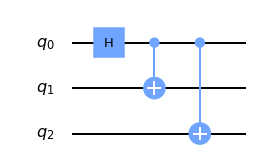

In [4]:
circ.draw('mpl')

<br>
<br>
<br>

# Simulating circuits using Qiskit Aer


## Statevector backend

In [5]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [6]:
job = execute(circ, backend)

In [7]:
result = job.result()

In [8]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


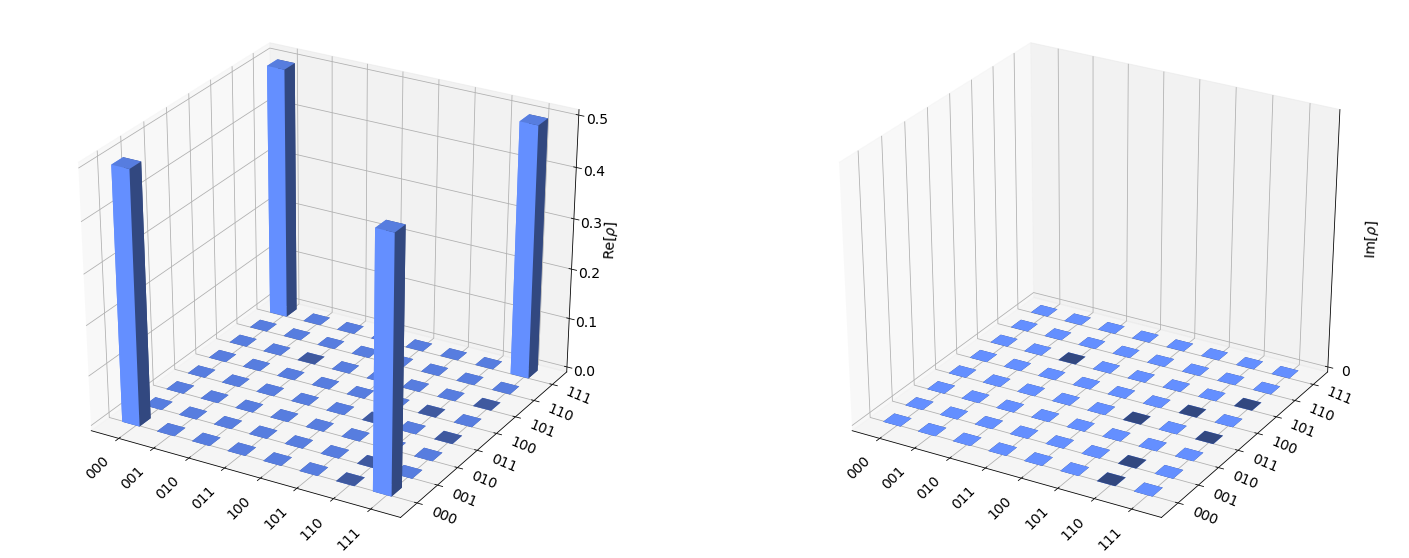

In [9]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate, figsize=(25,10))

## Unitary backend

In [10]:
# Run the quantum circuit on a unitary simulator backend
backend_unitary = Aer.get_backend('unitary_simulator')
job = execute(circ, backend_unitary)
result = job.result()

# Show the results
print(result.get_unitary(circ, decimals=3))

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.     

## OpenQASM backend


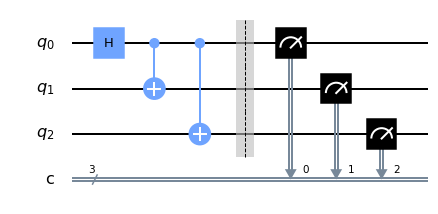

In [14]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ + meas

#drawing the circuit
qc.draw('mpl')

In [15]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=30000)

# Grab the results from the job.
result_sim = job_sim.result()

In [16]:
counts = result_sim.get_counts(qc)
print(counts)

{'000': 14977, '111': 15023}


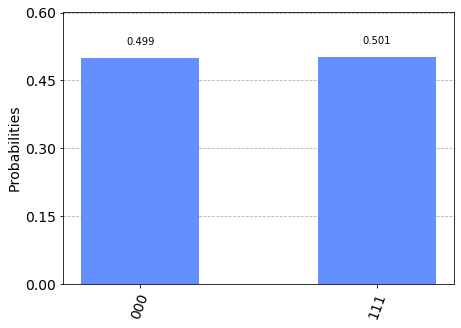

In [17]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [18]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright